# Task1:Prediction using Supervised ML 

## By Annapareddy Pardha Saradhi Reddy

## Sparks Foundation Internship


In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd



In [2]:
#Reading the data

students= pd.read_csv("C:/Users/pardh/Desktop/student_scores - student_scores.csv")
students.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#inspecting the data 
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
#Checking null values in the data
students.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
students.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Visualization

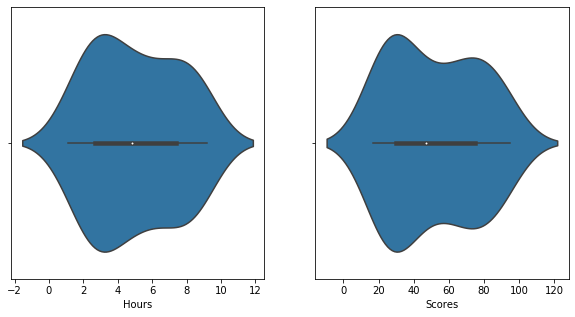

In [6]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.violinplot(students['Hours']);
plt.subplot(1,2,2)
sns.violinplot(students['Scores']);



### Train-Test split

In [7]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

students_train, students_test = train_test_split(students, train_size = 0.8, test_size = 0.2, random_state = 100)

In [8]:
students_train.shape

(20, 2)

In [9]:

X_train = students_train.drop('Scores',axis=1)
y_train=students_train['Scores']
X_train.head()

,Hours
19,7.4
23,6.9
21,4.8
6,9.2
12,4.5


### Building Model

In [10]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [11]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train = sm.add_constant(X_train)

In [12]:
lm = sm.OLS(y_train,X_train).fit()

In [13]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     356.7
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           2.59e-13
Time:                        22:39:15   Log-Likelihood:                -62.724
No. Observations:                  20   AIC:                             129.4
Df Residuals:                      18   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9894      3.106      0.641      0.5

In [14]:
y_train_cnt = lm.predict(X_train)

In [15]:
y_train_cnt.head()

19    74.771712
23    69.853989
21    49.199556
6     92.475511
12    46.248923
dtype: float64

In [16]:
students_train['y_train_predicted']=y_train_cnt
students_train.head()

,Hours,Scores,y_train_predicted
19,7.4,69,74.771712
23,6.9,76,69.853989
21,4.8,54,49.199556
6,9.2,88,92.475511
12,4.5,41,46.248923


Text(0, 0.5, 'y_cnt')

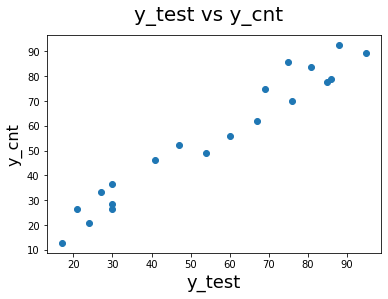

In [26]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_cnt)
fig.suptitle('y_test vs y_cnt', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_cnt', fontsize=16)           

In [17]:

X_test = students_test.drop('Scores',axis=1)
y_test=students_test['Scores']
X_test.head()

,Hours
9,2.7
22,3.8
13,3.3
11,5.9
5,1.5


In [18]:
X_test = sm.add_constant(X_test)
y_test_cnt = lm.predict(X_test)

In [19]:
students_test['y_test_predicted']=y_test_cnt
students_test.head()

,Hours,Scores,y_test_predicted
9,2.7,25,28.545123
22,3.8,35,39.364112
13,3.3,42,34.446390
11,5.9,62,60.018545
5,1.5,20,16.742590


In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [21]:
#Checking r-squared on test set
r_squared = r2_score(y_test, y_test_cnt)
r_squared

0.9050356232459791

Text(0, 0.5, 'y_cnt')

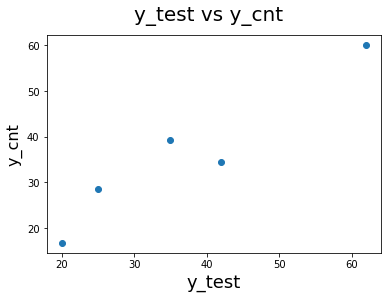

In [25]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_cnt)
fig.suptitle('y_test vs y_cnt', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_cnt', fontsize=16)           